In [1]:
import datetime 

import matplotlib.pyplot as plt

from cygnss_wetlands.cygnss.reader import CONFIG, CygnssL1Reader
from cygnss_wetlands.enums import GridType
from cygnss_wetlands.grids.ease import EASE2GRID

## A little demo of reading in CYGNSS L1 data and aggregating to a grid

### 1. Focus on Pacaya Samiria - Peru

In [2]:
# Create our reader object

# Note: ingestion is a lot faster if we limit it to a smaller geopgraphic area of interest
# (this is optional! The default is the full extent of CYGNSS mission range)
PACAYA_SAMIRIA_BBOX = (-77, -7, -73, -3) # xmin, ymin, xmax, ymax

reader = CygnssL1Reader(bbox=PACAYA_SAMIRIA_BBOX)

In [3]:
# Let's pick a grid we can aggregate/post our data to

# Here's a list of what is supported currently
# (custom grids can also be made! and more functionality is planned to be added!)
GridType.namelist()

['EASE2_G1km',
 'EASE2_G3km',
 'EASE2_N3km',
 'EASE2_S3km',
 'EASE2_G3125km',
 'EASE2_N3125km',
 'EASE2_S3125km',
 'EASE2_G625km',
 'EASE2_N625km',
 'EASE2_S625km',
 'EASE2_G9km',
 'EASE2_N9km',
 'EASE2_S9km',
 'EASE2_G125km',
 'EASE2_N125km',
 'EASE2_S125km',
 'EASE_G125km',
 'EASE_N125km',
 'EASE_S125km',
 'EASE2_G25km',
 'EASE2_N25km',
 'EASE2_S25km',
 'EASE_G25km',
 'EASE_N25km',
 'EASE_S25km',
 'EASE2_G36km',
 'EASE2_N36km',
 'EASE2_S36km']

100%|█████████████████████████████████████████████| 8/8 [00:02<00:00,  3.94it/s]


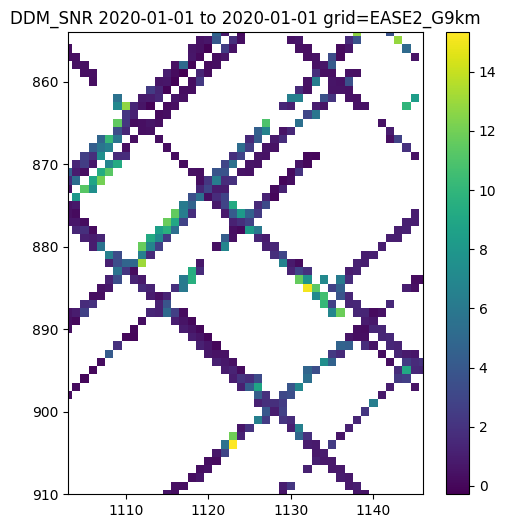

In [4]:
# Read in 1-days's worth of data, post to 9km grid
grid9km = EASE2GRID(GridType.EASE2_G9km)
d1 = datetime.datetime(2020,1,1)
d2 = datetime.datetime(2020,1,1)
snr = reader.aggregate(variable_name="ddm_snr", grid=grid9km, start_date=d1, end_date=d2)

# Plot
bbox_grid_xmin, bbox_grid_ymin = grid9km.lonlat2rc(reader.xmin, reader.ymin)
bbox_grid_xmax, bbox_grid_ymax = grid9km.lonlat2rc(reader.xmax, reader.ymax)

fig, ax = plt.subplots(figsize=(6,6))
pos = ax.imshow(snr)
fig.colorbar(pos, ax=ax)
ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')} grid={grid9km.name}")
ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)
plt.show()

100%|███████████████████████████████████████████| 40/40 [00:10<00:00,  3.96it/s]


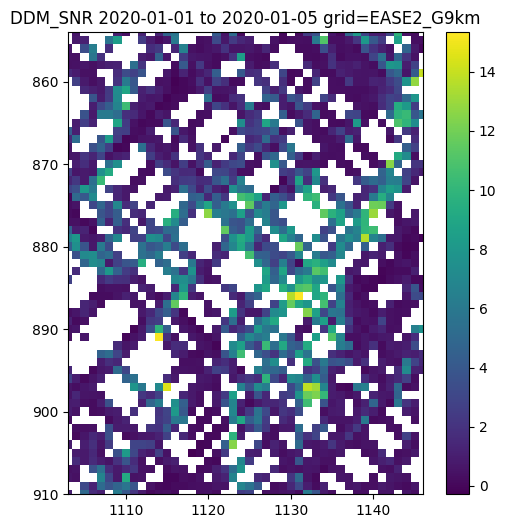

In [5]:
# Read in 5-days of data, post to 9km grid
d1 = datetime.datetime(2020,1,1)
d2 = datetime.datetime(2020,1,5)
snr = reader.aggregate(variable_name="ddm_snr", grid=grid9km, start_date=d1, end_date=d2)

# Plot
bbox_grid_xmin, bbox_grid_ymin = grid9km.lonlat2rc(reader.xmin, reader.ymin)
bbox_grid_xmax, bbox_grid_ymax = grid9km.lonlat2rc(reader.xmax, reader.ymax)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(snr)
fig.colorbar(pos, ax=ax)
ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')} grid={grid9km.name}")
ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)
plt.show()

100%|█████████████████████████████████████████| 120/120 [00:30<00:00,  3.95it/s]


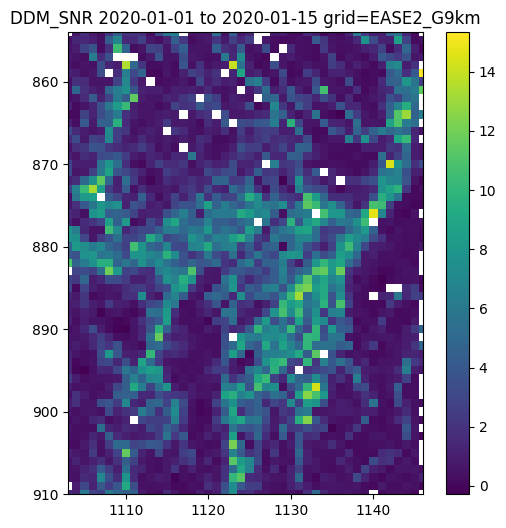

In [6]:
# Read 15-days of data, post to 9km grid
d1 = datetime.datetime(2020,1,1)
d2 = datetime.datetime(2020,1,15)
snr = reader.aggregate(variable_name="ddm_snr", grid=grid9km, start_date=d1, end_date=d2)

# Plot
bbox_grid_xmin, bbox_grid_ymin = grid9km.lonlat2rc(reader.xmin, reader.ymin)
bbox_grid_xmax, bbox_grid_ymax = grid9km.lonlat2rc(reader.xmax, reader.ymax)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(snr)
fig.colorbar(pos, ax=ax)
ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')} grid={grid9km.name}")
ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)
plt.show()

100%|█████████████████████████████████████████| 120/120 [00:30<00:00,  3.91it/s]


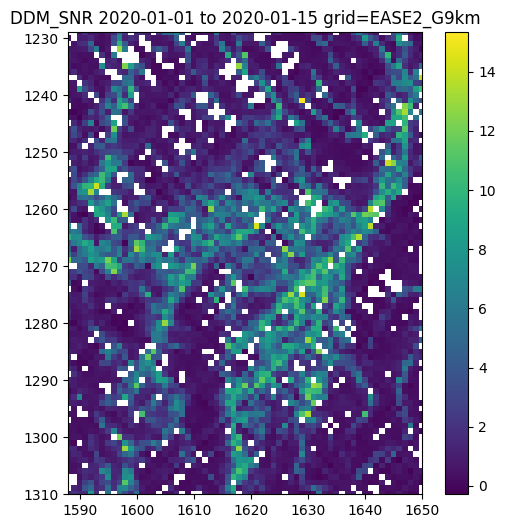

In [7]:
# Read in 15-days of data, finer grid - 6km
grid6km = EASE2GRID(GridType.EASE2_G625km)
d1 = datetime.datetime(2020,1,1)
d2 = datetime.datetime(2020,1,15)
snr = reader.aggregate(variable_name="ddm_snr", grid=grid6km, start_date=d1, end_date=d2)

# Plot
bbox_grid_xmin, bbox_grid_ymin = grid6km.lonlat2rc(reader.xmin, reader.ymin)
bbox_grid_xmax, bbox_grid_ymax = grid6km.lonlat2rc(reader.xmax, reader.ymax)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(snr)
fig.colorbar(pos, ax=ax)
ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')} grid={grid9km.name}")
ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)
plt.show()